In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [2]:
train= pd.read_csv("train.csv")
train.dropna(how='all', inplace=True)
train=train.rename(columns={'Unnamed: 0': 'Company'})
# train.fillna(0)
train.head()

Company       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0    IDSA  1.100910e+08         -0.1950     1.115350e+08 -1.444000e+06   
1     APD  1.043900e+10          0.0254     7.629900e+09  2.809100e+09   
2    CHTR  9.108000e+09          0.1169     0.000000e+00  9.108000e+09   
3    OTEX  1.624699e+09          0.1917     5.107420e+08  1.113957e+09   
4    SMBC  3.747200e+07          0.1880     0.000000e+00  3.747200e+07   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0           0.0  6.438000e+06        6.438000e+06     -7.882000e+06   
1   139800000.0  1.054700e+09        1.470000e+09      1.339100e+09   
2           0.0  5.973000e+09        8.137000e+09      9.710000e+08   
3   176834000.0  4.890210e+08        8.134290e+08      3.005280e+08   
4           0.0  1.872300e+07        2.364600e+07      1.382600e+07   

   Interest Expense  Earnings before Tax  Income Tax Expense  \
0          849000.0        -7.235000e+06             38000.0   
1       125100000.0         1.361100e+09         369400000.0   
2       911000000.0         5.300000e+07         236000000.0   
3        27934000.0         2.765860e+08          58461000.0   
4               0.0         1.382600e+07           3745000.0   

   Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                               0.0                     -1413000.0   
1                         1400000.0                      2900000.0   
2                               0.0                            0.0   
3                          -51000.0                            0.0   
4                               0.0                            0.0   

    Net Income  Preferred Dividends  Net Income Com   EPS  EPS Diluted  \
0   -7273000.0                  0.0      -7273000.0 -0.96       -0.960   
1  991700000.0                  0.0     991700000.0  4.66        4.610   
2 -183000000.0                  0.0    -183000000.0 -1.88       -1.880   
3  218125000.0                  0.0     218125000.0  0.91        0.905   
4   10081000.0             200000.0       9881000.0  1.49        1.450   

   Weighted Average Shs Out  Weighted Average Shs Out (Dil)  \
0                 7956410.0                       7956410.0   
1               213015723.0                     212700000.0   
2               109268321.0                      97991915.0   
3               243184696.0                     239348000.0   
4                 6623480.0                       6623480.0   

   Dividend per Share  Gross Margin  EBITDA Margin  EBIT Margin  \
0               0.000       -0.0131         -0.034      -0.0580   
1               3.020        0.2691          0.234       0.1424   
2               0.000        1.0000          0.337       0.1058   
3               0.311        0.6856          0.302       0.1874   
4               0.320        1.0000          0.427       0.3690   

   Profit Margin  Free Cash Flow margin        EBITDA          EBIT  \
0         -0.066                -0.0217 -3.703000e+06 -6.386000e+06   
1          0.095                 0.0793  2.443100e+09  1.486200e+09   
2         -0.020                 0.0200  3.066000e+09  9.640000e+08   
3          0.134                 0.2307  4.906970e+08  3.045200e+08   
4          0.264                 0.2271  1.601100e+07  1.382600e+07   

   Consolidated Income  Earnings Before Tax Margin  Net Profit Margin  \
0           -7273000.0                     -0.0657            -0.0661   
1          993100000.0                      0.1304             0.0950   
2         -183000000.0                      0.0058            -0.0201   
3          218074000.0                      0.1702             0.1343   
4           10081000.0                      0.3690             0.2690   

   Cash and cash equivalents  Short-term investments  \
0               1.059000e+06                     0.0   
1               3.366000e+08                     0.0   
2               7.114000e+09                     0.0   
3      

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15452 entries, 0 to 15451
Columns: 225 entries, Company to year
dtypes: float64(221), int64(2), object(2)
memory usage: 26.5+ MB


In [5]:
# test.info()

In [6]:
train['Class']=train['Class'].astype('object')
# test['Class']=test['Class'].astype('object')

In [7]:
train.describe()

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
count  1.526300e+04    14514.000000     1.514700e+04  1.524900e+04   
mean   5.773380e+09        9.618092     3.645150e+09  2.126539e+09   
std    3.246067e+10      606.140755     2.473818e+10  1.046013e+10   
min   -6.276160e+08       -1.773200    -5.455740e+08 -1.280800e+10   
25%    5.310800e+07       -0.011000     3.026130e+06  2.717700e+07   
50%    4.413870e+08        0.056400     1.531250e+08  1.869240e+08   
75%    2.438913e+09        0.187100     1.252000e+09  8.846000e+08   
max    1.824700e+12    42138.663900     1.537250e+12  4.621600e+11   

       R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
count  1.489000e+04  1.520100e+04        1.520400e+04      1.525600e+04   
mean   8.880202e+07  9.380711e+08        1.426790e+09      6.634203e+08   
std    5.880235e+08  4.647481e+09        6.867717e+09      3.622039e+09   
min   -1.500000e+05  0.000000e+00       -1.088448e+09     -1.351200e+10   
25%    0.000000e+00  1.539600e+07        3.106675e+07     -3.243949e+06   
50%    0.000000e+00  7.489000e+07        1.375290e+08      3.832284e+07   
75%    1.186600e+07  3.578450e+08        5.856220e+08      2.637420e+08   
max    1.153700e+10  1.856830e+11        3.056050e+11      1.565540e+11   

       Interest Expense  Earnings before Tax  Income Tax Expense  \
count      1.520300e+04         1.514400e+04        1.518800e+04   
mean       9.965528e+07         5.532732e+08        1.673588e+08   
std        6.412249e+08         2.672630e+09        9.347956e+08   
min       -3.979790e+08        -1.737800e+10       -5.249000e+09   
25%        0.000000e+00        -6.394290e+06        0.000000e+00   
50%        2.778000e+06         2.608000e+07        5.195000e+06   
75%        4.273236e+07         2.084170e+08        5.585500e+07   
max        3.152300e+10         8.720500e+10        3.970800e+10   

       Net Income - Non-Controlling int  Net Income - Discontinued ops  \
count                      1.483400e+04                   1.483400e+04   
mean                       1.652827e+07                  -5.056449e+06   
std                        1.622758e+08                   2.551610e+08   
min                       -1.587227e+09                  -1.076600e+10   
25%                        0.000000e+00                   0.000000e+00   
50%                        0.000000e+00                   0.000000e+00   
75%                        0.000000e+00                   0.000000e+00   
max                        4.917409e+09                   8.368000e+09   

         Net Income  Preferred Dividends  Net Income Com           EPS  \
count  1.531400e+04         1.483400e+04    1.537600e+04  1.513600e+04   
mean   4.665398e+08         4.599410e+06    4.611852e+08 -2.171639e+04   
std    4.282743e+09         6.217036e+07    4.273608e+09  1.464529e+06   
min   -1.212900e+10        -1.262800e+07   -1.223600e+10 -1.018709e+08   
25%   -6.233859e+06         0.000000e+00   -7.038655e+06 -3.400000e-01   
50%    1.986700e+07         0.000000e+00    1.879200e+07  7.100000e-01   
75%    1.580000e+08         0.000000e+00    1.548707e+08  2.000000e+00   
max    2.339970e+11         2.741588e+09    2.339970e+11  8.028004e+06   

        EPS Diluted  Weighted Average Shs Out  Weighted Average Shs Out (Dil)  \
count  1.510000e+04              1.455200e+04                    1.496900e+04   
mean  -2.223312e+04              2.714701e+08                    2.722105e+08   
std    1.463942e+06              2.039434e+09                    2.125209e+09   
min   -1.018709e+08              0.000000e+00                    0.000000e+00   
25%   -3.400000e-01              1.599437e+07                    1.395948e+07   
50%    6.900000e-01              4.305142e+07                    4.035100e+07   
75%    1.970000e+00              1.188528e+08                    1.159000e+08   
max    6.624003e+06              1.112920e+11                    1.112920e+11   

       Dividend per Share  G

In [8]:
# test.describe()

In [9]:
from sklearn.impute import SimpleImputer

def filling_missing_value(df):
    #divide data into 2 part: numeric and object
    num_cols=train.select_dtypes(include='number').columns
    cat_cols= df.select_dtypes(include='object').columns

    #impute data by median for num and most frequence for object
    num_impute= SimpleImputer(strategy='mean')
    cat_impute= SimpleImputer(strategy='most_frequent')

    #fill missing value
    df[num_cols]= num_impute.fit_transform(df[num_cols])
    df[cat_cols]= cat_impute.fit_transform(df[cat_cols])
    return train

In [10]:
train=filling_missing_value(train)
# test= filling_missing_value(test)

In [11]:
train.isna().sum()

Company                 0
Revenue                 0
Revenue Growth          0
Cost of Revenue         0
Gross Profit            0
                       ..
R&D Expense Growth      0
SG&A Expenses Growth    0
Sector                  0
Class                   0
year                    0
Length: 225, dtype: int64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15452 entries, 0 to 15451
Columns: 225 entries, Company to year
dtypes: float64(222), object(3)
memory usage: 26.5+ MB


In [13]:
train['Class'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15452 entries, 0 to 15451
Series name: Class
Non-Null Count  Dtype 
--------------  ----- 
15452 non-null  object
dtypes: object(1)
memory usage: 120.8+ KB


Ý tưởng: Bài Toán chia thành 2 trường hợp: Short term and long term

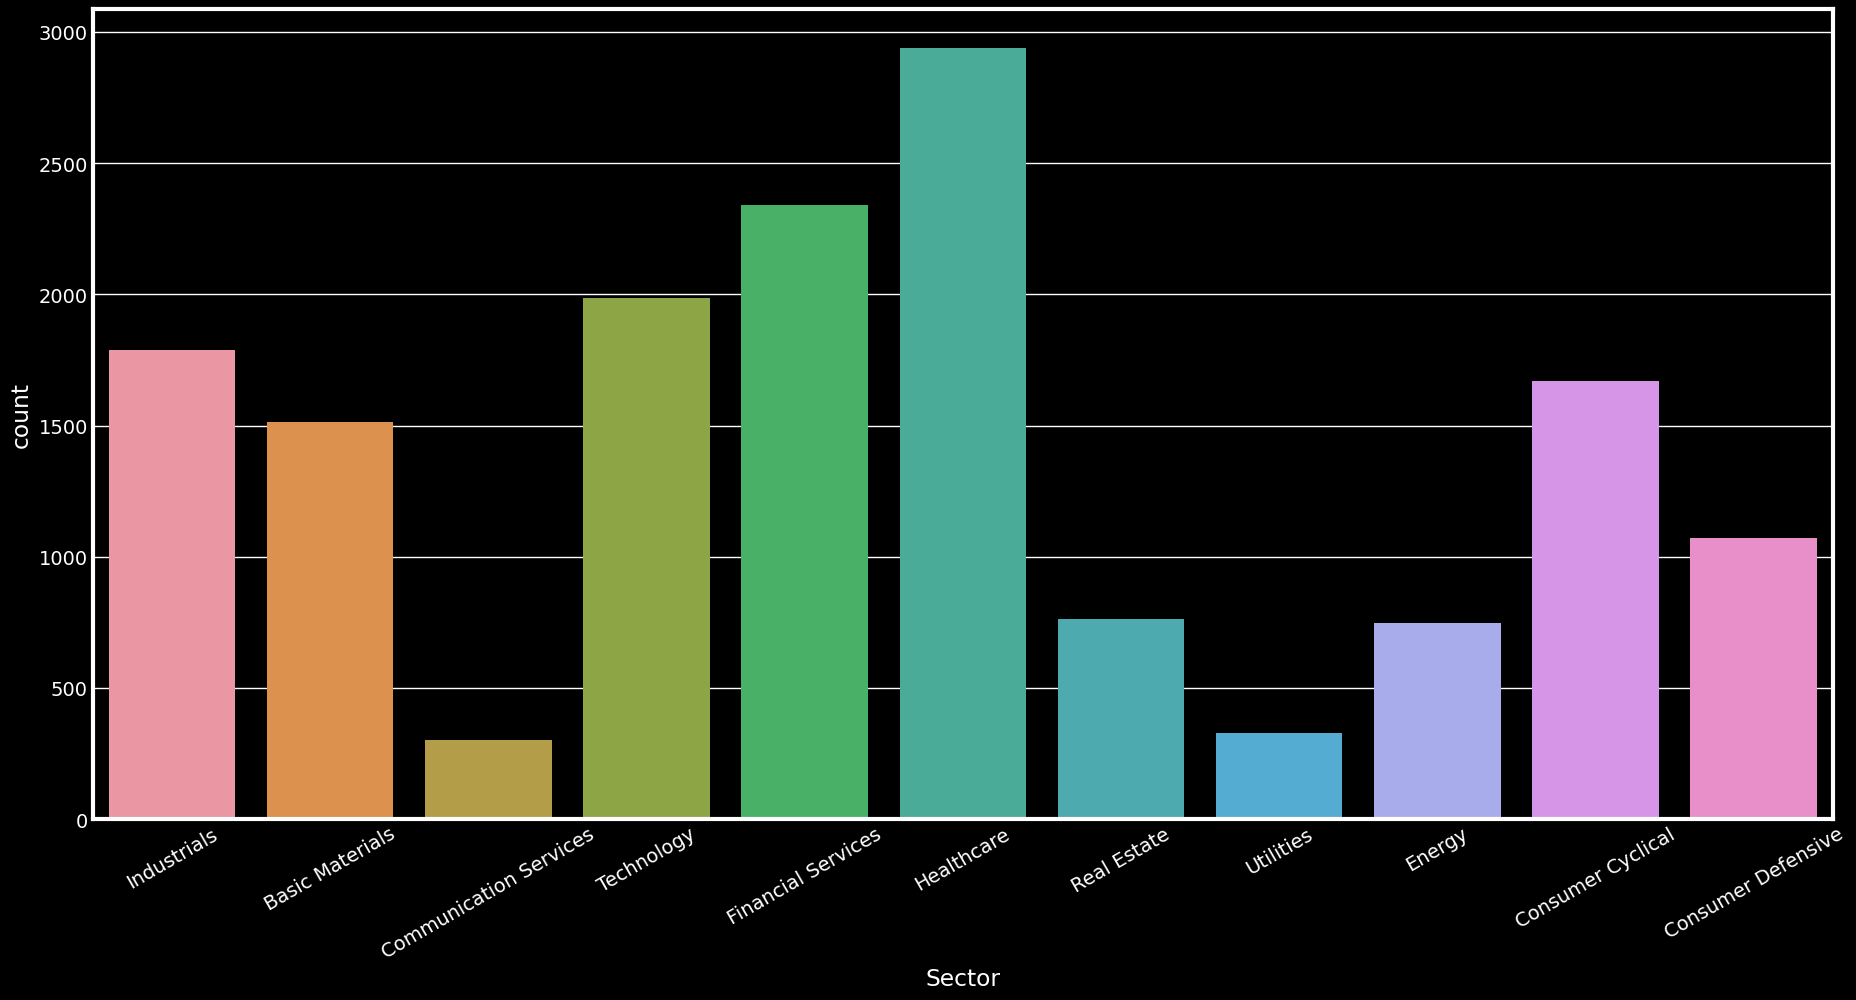

In [14]:
plt.figure(figsize = (20,10))
plot = sns.countplot(x=train['Sector'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
plt.show()

Text(0.5, 1.0, 'Class count')

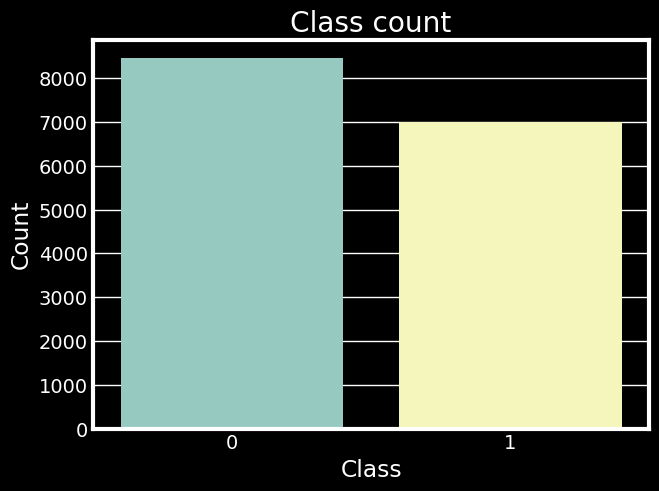

In [15]:
class_binary = list(train['Class'].values)
counts = {0: class_binary.count(0), 1: class_binary.count(1)}
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class count')

In [16]:
print(f"Any row in all columns is null: {train.isna().values.all()}")

Any row in all columns is null: False


In [17]:
list(set(train.dtypes.tolist()))

[dtype('O'), dtype('float64')]

In [18]:
train.select_dtypes(include='object')

Company                  Sector Class
0        IDSA             Industrials     0
1         APD         Basic Materials     0
2        CHTR  Communication Services     1
3        OTEX              Technology     0
4        SMBC      Financial Services     1
...       ...                     ...   ...
15447     BKJ      Financial Services     1
15448     HRB       Consumer Cyclical     1
15449    LITE              Technology     1
15450    BIOL              Healthcare     0
15451    CLAR       Consumer Cyclical     0

[15452 rows x 3 columns]

In [19]:
train = train[['Company','Revenue','Revenue Growth','Cost of Revenue','Gross Profit','Gross Margin','Total liabilities','Total assets','quickRatio','Cash and cash equivalents','Cash and short-term investments','currentRatio',
'cashRatio','Operating Cash Flow','debtRatio','debtEquityRatio','Operating Income','Interest Expense','Total debt','Inventory Turnover','Dividend per Share','Inventories','Average Receivables', 'Investments', 'Investment purchases and sales',
'Average Inventory','operatingProfitMargin','ROE','Book Value per Share','Dividend Yield','Earnings Yield','priceEarningsRatio','Net Income','Short-term investments','Property, Plant & Equipment Net','Goodwill and Intangible Assets','Long-term investments','year','Sector','Class']].copy()

In [20]:
# test= test[['Company','Revenue','Revenue Growth','Cost of Revenue','Gross Profit','Gross Margin','Total liabilities','Total assets','quickRatio','Cash and cash equivalents','Cash and short-term investments','currentRatio',
# 'cashRatio','Operating Cash Flow','debtRatio','debtEquityRatio','Operating Income','Interest Expense','Total debt','Inventory Turnover','Dividend per Share','Inventories','Average Receivables', 'Investments', 'Investment purchases and sales',
# 'Average Inventory','operatingProfitMargin','ROE','Book Value per Share','Dividend Yield','Earnings Yield','priceEarningsRatio','Net Income','Short-term investments','Property, Plant & Equipment Net','Goodwill and Intangible Assets','Long-term investments','year','Sector','Class']].copy()

In [21]:
train

Company       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0        IDSA  1.100910e+08         -0.1950     1.115350e+08 -1.444000e+06   
1         APD  1.043900e+10          0.0254     7.629900e+09  2.809100e+09   
2        CHTR  9.108000e+09          0.1169     0.000000e+00  9.108000e+09   
3        OTEX  1.624699e+09          0.1917     5.107420e+08  1.113957e+09   
4        SMBC  3.747200e+07          0.1880     0.000000e+00  3.747200e+07   
...       ...           ...             ...              ...           ...   
15447     BKJ  1.836400e+07          0.0053     0.000000e+00  1.836400e+07   
15448     HRB  3.024295e+09          0.0407     1.572377e+09  1.451918e+09   
15449    LITE  8.179000e+08          0.0623     5.613000e+08  2.566000e+08   
15450    BIOL  4.765600e+07         -0.1555     2.948400e+07  1.817200e+07   
15451    CLAR  1.583030e+08          0.1218     1.006740e+08  5.762900e+07   

       Gross Margin  Total liabilities  Total assets  quickRatio  \
0           -0.0131       2.128500e+07  3.779000e+07    0.489312   
1            0.2691       9.970500e+09  1.777910e+10    0.844077   
2            1.0000       2.424200e+10  2.438800e+10    4.525382   
3            0.6856       2.257531e+09  3.899698e+09    1.124170   
4            1.0000       9.103110e+08  1.021422e+09    6.330918   
...             ...                ...           ...         ...   
15447        1.0000       6.837940e+08  7.436880e+08    6.330918   
15448        0.4801       3.136980e+09  4.693529e+09    1.260524   
15449        0.3137       1.565000e+08  4.921000e+08    1.142440   
15450        0.3813       1.734700e+07  5.940300e+07    2.511547   
15451        0.3640       5.834700e+07  3.155400e+08    2.072649   

       Cash and cash equivalents  Cash and short-term investments  \
0                   1.059000e+06                     1.059000e+06   
1                   3.366000e+08                     3.366000e+08   
2                   7.114000e+09                     7.114000e+09   
3                   4.278900e+08                     4.278900e+08   
4                   1.658700e+07                     8.029037e+08   
...                          ...                              ...   
15447               2.306000e+07                     8.029037e+08   
15448               2.300626e+09                     2.724121e+09   
15449               1.990000e+07                     1.990000e+07   
15450               3.156000e+07                     3.156000e+07   
15451               2.978800e+07                     3.969000e+07   

       currentRatio  cashRatio  Operating Cash Flow  debtRatio  \
0          0.886000   0.049753        -2.431000e+06     0.4231   
1          1.112000   0.113601         2.190100e+09     0.3441   
2          0.211000   4.351070         2.359000e+09     0.8564   
3          1.272000   0.667326         4.171270e+08     0.3383   
4          6.881247   1.934346         1.334200e+07     0.1182   
...             ...        ...                  ...        ...   
15447      6.881247   1.934346         8.442000e+06     0.0443   
15448      1.346000   0.994600         8.095810e+08     0.1931   
15449      2.089000   0.145362         6.280000e+07     0.0000   
15450      3.393000   1.954059        -1.620100e+07     0.0000   
15451      4.873000   0.915427        -2.867500e+07     0.0588   

       debtEquityRatio  Operating Income  Interest Expense    Total debt  \
0               0.9688     -7.882000e+06          849000.0  1.599000e+07   
1               0.8307      1.339100e+09       125100000.0  6.118500e+09   
2             143.0616      9.710000e+08       911000000.0  2.088700e+10   
3               0.8036      3.005280e+08        27934000.0  1.319332e+09   
4               1.0868      1.382600e+07               0.0  1.207600e+08   
...                ...               ...               ...           ...   
15447           0.5501      5.911000e+06               0.0  3.295000e+07   
15448           0.5824

In [22]:
# test

In [23]:
# Short Term Assets
train['liquid_cash'] = (train['Cash and cash equivalents'] + train['Cash and short-term investments']).round(2)

train['shortterm_asset'] = 0
col_list = ['liquid_cash', 'Inventories', 'Average Receivables', 'Investments', 'Investment purchases and sales', 'Short-term investments']
for col in col_list:
    train['shortterm_asset'] = (train['shortterm_asset'] + train[col]).round(2)

# long term assets
train['longterm_asset'] = (train['Property, Plant & Equipment Net'] + train['Goodwill and Intangible Assets'] + train['Long-term investments']).round(2)

In [24]:
values = (train.groupby('Company')[['quickRatio', 'currentRatio', 'debtEquityRatio', 'shortterm_asset', 'longterm_asset','Inventory Turnover']].mean()
               .reset_index()
               .rename(columns={
                   'quickRatio': 'mean_quickratio',
                   'currentRatio': 'mean_currentratio',
                   'debtEquityRatio': 'mean_debtequityratio',
                   'Inventory Turnover': 'mean_inventoryturnover',
                   'shortterm_asset': 'mean_shortterm_asset',
                   'longterm_asset': 'mean_longterm_asset'}
                   ))
train = train.merge(values, on='Company', how='outer')


In [25]:
train_analyze = train[(train['mean_quickratio'] >=1) & 
        (train['mean_currentratio'].between(1, 2)) & 
        (train['mean_debtequityratio'].between(.3, .6)) & 
        (train['mean_inventoryturnover'].between(5, 10))].sort_values(by=['Company', 'year'])
train_analyze[['year', 'Company', 'mean_quickratio', 'mean_currentratio', 'mean_debtequityratio', 'mean_inventoryturnover']]

year Company  mean_quickratio  mean_currentratio  \
14066  2014.0     ABB         1.145443             1.6040   
8081   2014.0     AME         1.028770             1.6860   
8082   2014.0     AME         1.028770             1.6860   
8083   2014.0     AME         1.028770             1.6860   
1064   2014.0    CPST         1.123086             1.5310   
...       ...     ...              ...                ...   
9566   2014.0     TDY         1.005751             1.7470   
12684  2014.0     VFC         1.344185             1.9325   
12685  2014.0     VFC         1.344185             1.9325   
12687  2014.0     VFC         1.344185             1.9325   
12686  2015.0     VFC         1.344185             1.9325   

       mean_debtequityratio  mean_inventoryturnover  
14066              0.471100                7.000000  
8081               0.529100                8.478500  
8082               0.529100                8.478500  
8083               0.529100                8.478500  
1064               0.406900                6.219100  
...                     ...                     ...  
9566               0.494000                7.899700  
12684              0.440675                8.164975  
12685              0.440675                8.164975  
12687              0.440675                8.164975  
12686              0.440675                8.164975  

[78 rows x 6 columns]

In [26]:
ratio_train = train[['year', 'Company', 'quickRatio', 'currentRatio', 'debtEquityRatio', 'Inventory Turnover']]
value_list = [col for col in ratio_train.select_dtypes(include=[np.number]) if col != 'year']
ratio_train = pd.melt(ratio_train, id_vars=['year', 'Company'], value_vars=value_list, var_name='ratio_and_turnover')

asset_train = train[['year', 'Company', 'shortterm_asset', 'longterm_asset']]
asset_train = pd.melt(asset_train, id_vars=['year', 'Company'], value_vars=['shortterm_asset', 'longterm_asset'], var_name='assets')

In [27]:
def ratio_and_turnover(df, company_list):
    for company in company_list:
        new_df = df[df['Company'] == company]
        fig = px.line(new_df, x='year', y='value', color='ratio_and_turnover', template='plotly_dark', title=f'Ratio and Turnover Info for {company} company')
        fig.update_xaxes(tickmode='linear')
        fig.show()

def plot_asset(df, company_list):
    for company in company_list:
        new_df = df[df['Company'] == company]
        fig = px.line(new_df, x='year', y='value', color='assets', template='plotly_dark', title=f'Long-term & Short-Term Asset Info for {company} company')
        fig.update_xaxes(tickmode='linear')
        fig.show()

In [28]:
company_list=['LLY','MDCO','MRK','PCRX','RIO','VFC']

In [29]:
ratio_and_turnover(ratio_train,company_list)

In [30]:
plot_asset(asset_train,company_list)

Model

In [31]:
train.head()

Company      Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0    IDSA  110091000.0          -0.195      111535000.0    -1444000.0   
1    IDSA  110091000.0          -0.195      111535000.0    -1444000.0   
2    IDSA  110091000.0          -0.195      111535000.0    -1444000.0   
3    IDSA  110091000.0          -0.195      111535000.0    -1444000.0   
4    IDSA  110091000.0          -0.195      111535000.0    -1444000.0   

   Gross Margin  Total liabilities  Total assets  quickRatio  \
0       -0.0131         21285000.0    37790000.0    0.489312   
1       -0.0131         21285000.0    37790000.0    0.489312   
2       -0.0131         21285000.0    37790000.0    0.489312   
3       -0.0131         21285000.0    37790000.0    0.489312   
4       -0.0131         21285000.0    37790000.0    0.489312   

   Cash and cash equivalents  Cash and short-term investments  currentRatio  \
0                  1059000.0                        1059000.0         0.886   
1                  1059000.0                        1059000.0         0.886   
2                  1059000.0                        1059000.0         0.886   
3                  1059000.0                        1059000.0         0.886   
4                  1059000.0                        1059000.0         0.886   

   cashRatio  Operating Cash Flow  debtRatio  debtEquityRatio  \
0   0.049753           -2431000.0     0.4231           0.9688   
1   0.049753           -2431000.0     0.4231           0.9688   
2   0.049753           -2431000.0     0.4231           0.9688   
3   0.049753           -2431000.0     0.4231           0.9688   
4   0.049753           -2431000.0     0.4231           0.9688   

   Operating Income  Interest Expense  Total debt  Inventory Turnover  \
0        -7882000.0          849000.0  15990000.0             14.1952   
1        -7882000.0          849000.0  15990000.0             14.1952   
2        -7882000.0          849000.0  15990000.0             14.1952   
3        -7882000.0          849000.0  15990000.0             14.1952   
4        -7882000.0          849000.0  15990000.0             14.1952   

   Dividend per Share  Inventories  Average Receivables  Investments  \
0                 0.0    6729000.0           10406000.0          0.0   
1                 0.0    6729000.0           10406000.0          0.0   
2                 0.0    6729000.0           10406000.0          0.0   
3                 0.0    6729000.0           10406000.0          0.0   
4                 0.0    6729000.0           10406000.0          0.0   

   Investment purchases and sales  Average Inventory  operatingProfitMargin  \
0                             0.0          7755500.0                    1.0   
1                             0.0          7755500.0                    1.0   
2                             0.0          7755500.0                    1.0   
3                             0.0          7755500.0                    1.0   
4                             0.0          7755500.0                    1.0   

      ROE  Book Value per Share  Dividend Yield  Earnings Yield  \
0 -0.4407                 2.074             0.0         -0.1608   
1 -0.4407                 2.074             0.0         -0.1608   
2 -0.4407                 2.074             0.0         -0.1608   
3 -0.4407                 2.074             0.0         -0.1608   
4 -0.4407                 2.074             0.0         -0.1608   

   priceEarningsRatio  Net Income  Short-term investments  \
0                 0.0  -7273000.0                     0.0   
1                 0.0  -7273000.0                     0.0   
2                 0.0  -7273000.0                     0.0   
3                 0.0  -7273000.0                     0.0   
4                 0.0  -7273000.0                     0.0   

   Property, Plant & Equipment Net  Goodwill and Intangible Assets  \
0                       17563000.0                             0.0   
1                       17563000.0                     

In [32]:
train.drop(['operatingProfitMargin'],axis=1, inplace=True)
# test.drop(['operatingProfitMargin'],axis=1, inplace=True)

In [33]:
nan_check = train.isnull().values.any()
print("NaN check:", nan_check)

NaN check: False


In [34]:
train['Class']= train['Class'].astype(int)
train['Class'].info()

<class 'pandas.core.series.Series'>
Int64Index: 15452 entries, 0 to 15451
Series name: Class
Non-Null Count  Dtype
--------------  -----
15452 non-null  int32
dtypes: int32(1)
memory usage: 181.1 KB


In [35]:
# test['Class']= test['Class'].astype(int)
# test['Class'].info()

In [36]:
num_cols = train.select_dtypes(include=['float64','int32'])
cat_cols= train.select_dtypes(include='object').columns

In [37]:
# num_cols_test = test.select_dtypes(include=['float64','int32'])
#cat_cols_test= train.select_dtypes(include='object').columns

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_cols)
normalized_df = pd.DataFrame(normalized_data, columns=num_cols.columns)
normalized_df

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  Gross Margin  \
0      0.000404        0.000037         0.000427      0.026963      0.965276   
1      0.000404        0.000037         0.000427      0.026963      0.965276   
2      0.000404        0.000037         0.000427      0.026963      0.965276   
3      0.000404        0.000037         0.000427      0.026963      0.965276   
4      0.000404        0.000037         0.000427      0.026963      0.965276   
...         ...             ...              ...           ...           ...   
15447  0.002616        0.000043         0.000759      0.034388      0.976488   
15448  0.000354        0.000042         0.000355      0.027005      0.978437   
15449  0.000440        0.000039         0.000452      0.027019      0.967321   
15450  0.002630        0.000041         0.001183      0.033070      0.974471   
15451  0.000478        0.000047         0.000485      0.027059      0.967790   

       Total liabilities  Total assets  quickRatio  Cash and cash equivalents  \
0               0.000149      0.000002    0.000084               2.067116e-06   
1               0.000149      0.000002    0.000084               2.067116e-06   
2               0.000149      0.000002    0.000084               2.067116e-06   
3               0.000149      0.000002    0.000084               2.067116e-06   
4               0.000149      0.000002    0.000084               2.067116e-06   
...                  ...           ...         ...                        ...   
15447           0.000363      0.000530    0.000297               2.181110e-03   
15448           0.000173      0.000027    0.001082               2.533827e-05   
15449           0.000150      0.000007    0.000117               7.640404e-07   
15450           0.000676      0.000611    0.000060               2.732731e-05   
15451           0.000151      0.000009    0.000046               7.446692e-06   

       Cash and short-term investments  currentRatio  cashRatio  \
0                             0.000012      0.000397   0.000220   
1                             0.000012      0.000397   0.000220   
2                             0.000012      0.000397   0.000220   
3                             0.000012      0.000397   0.000220   
4                             0.000012      0.000397   0.000220   
...                                ...           ...        ...   
15447                         0.043630      0.000561   0.001984   
15448                         0.009368      0.001421   0.008567   
15449                         0.000005      0.000788   0.000065   
15450                         0.000163      0.000376   0.000067   
15451                         0.000045      0.000370   0.000953   

       Operating Cash Flow  debtRatio  debtEquityRatio  Operating Income  \
0                 0.032017   0.006011         0.120484          0.079405   
1                 0.032017   0.006011         0.120484          0.079405   
2                 0.032017   0.006011         0.120484          0.079405   
3                 0.032017   0.006011         0.120484          0.079405   
4                 0.032017   0.006011         0.120484          0.079405   
...                    ...        ...              ...               ...   
15447             0.033318   0.003902         0.120176          0.081878   
15448             0.032026   0.003668         0.120386          0.079483   
15449             0.032036   0.004253         0.120205          0.079375   
15450             0.034410   0.006672         0.121089          0.065639   
15451             0.032049   0.003218         0.120114          0.079545   

       Interest Expense  Total debt  Inventory Turnover  Dividend per Share  \
0              0.012494    0.001691            0.001006             0.00000   
1              0.012494    0.001691            0.001006             0.00000   
2              0.012494    0.001691            0.001006             0.00000   
3              0.012494    0.001691     

In [40]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder()
encoded= encoder.fit_transform(train[cat_cols])
df_cat_endcoder= pd.DataFrame(encoded.toarray(),columns= encoder.get_feature_names_out(cat_cols))
df_cat_endcoder

Company_A  Company_AA  Company_AABA  Company_AAL  Company_AAMC  \
0            0.0         0.0           0.0          0.0           0.0   
1            0.0         0.0           0.0          0.0           0.0   
2            0.0         0.0           0.0          0.0           0.0   
3            0.0         0.0           0.0          0.0           0.0   
4            0.0         0.0           0.0          0.0           0.0   
...          ...         ...           ...          ...           ...   
15447        0.0         0.0           0.0          0.0           0.0   
15448        0.0         0.0           0.0          0.0           0.0   
15449        0.0         0.0           0.0          0.0           0.0   
15450        0.0         0.0           0.0          0.0           0.0   
15451        0.0         0.0           0.0          0.0           0.0   

       Company_AAME  Company_AAN  Company_AAOI  Company_AAON  Company_AAPL  \
0               0.0          0.0           0.0           0.0           0.0   
1               0.0          0.0           0.0           0.0           0.0   
2               0.0          0.0           0.0           0.0           0.0   
3               0.0          0.0           0.0           0.0           0.0   
4               0.0          0.0           0.0           0.0           0.0   
...             ...          ...           ...           ...           ...   
15447           0.0          0.0           0.0           0.0           0.0   
15448           0.0          0.0           0.0           0.0           0.0   
15449           0.0          0.0           0.0           0.0           0.0   
15450           0.0          0.0           0.0           0.0           0.0   
15451           0.0          0.0           0.0           0.0           0.0   

       Company_AAT  Company_AAU  Company_AAWW  Company_AAXN  Company_AB  \
0              0.0          0.0           0.0           0.0         0.0   
1              0.0          0.0           0.0           0.0         0.0   
2              0.0          0.0           0.0           0.0         0.0   
3              0.0          0.0           0.0           0.0         0.0   
4              0.0          0.0           0.0           0.0         0.0   
...            ...          ...           ...           ...         ...   
15447          0.0          0.0           0.0           0.0         0.0   
15448          0.0          0.0           0.0           0.0         0.0   
15449          0.0          0.0           0.0           0.0         0.0   
15450          0.0          0.0           0.0           0.0         0.0   
15451          0.0          0.0           0.0           0.0         0.0   

       Company_ABB  Company_ABBV  Company_ABC  Company_ABCB  Company_ABEO  \
0              0.0           0.0          0.0           0.0           0.0   
1              0.0           0.0          0.0           0.0           0.0   
2              0.0           0.0          0.0           0.0           0.0   
3              0.0           0.0          0.0           0.0           0.0   
4              0.0           0.0          0.0           0.0           0.0   
...            ...           ...          ...           ...           ...   
15447          0.0           0.0          0.0           0.0           0.0   
15448          0.0           0.0          0.0           0.0           0.0   
15449          0.0           0.0          0.0           0.0           0.0   
15450          0.0           0.0          0.0           0.0           0.0   
15451          0.0           0.0          0.0           0.0           0.0   

       Company_ABEV  Company_ABG  Company_ABIL  Company_ABIO  Company_ABM  \
0               0.0          0.0           0.0           0.0          0.0   
1               0.0          0.0           0.0           0.0          0.0   
2               0.0          0.0           0.0           0.0          0.0   
3               0.0          0.0           0.0           0.

In [41]:
train = pd.concat([df_cat_endcoder,normalized_df],axis=1)
train.head()

Company_A  Company_AA  Company_AABA  Company_AAL  Company_AAMC  \
0        0.0         0.0           0.0          0.0           0.0   
1        0.0         0.0           0.0          0.0           0.0   
2        0.0         0.0           0.0          0.0           0.0   
3        0.0         0.0           0.0          0.0           0.0   
4        0.0         0.0           0.0          0.0           0.0   

   Company_AAME  Company_AAN  Company_AAOI  Company_AAON  Company_AAPL  \
0           0.0          0.0           0.0           0.0           0.0   
1           0.0          0.0           0.0           0.0           0.0   
2           0.0          0.0           0.0           0.0           0.0   
3           0.0          0.0           0.0           0.0           0.0   
4           0.0          0.0           0.0           0.0           0.0   

   Company_AAT  Company_AAU  Company_AAWW  Company_AAXN  Company_AB  \
0          0.0          0.0           0.0           0.0         0.0   
1          0.0          0.0           0.0           0.0         0.0   
2          0.0          0.0           0.0           0.0         0.0   
3          0.0          0.0           0.0           0.0         0.0   
4          0.0          0.0           0.0           0.0         0.0   

   Company_ABB  Company_ABBV  Company_ABC  Company_ABCB  Company_ABEO  \
0          0.0           0.0          0.0           0.0           0.0   
1          0.0           0.0          0.0           0.0           0.0   
2          0.0           0.0          0.0           0.0           0.0   
3          0.0           0.0          0.0           0.0           0.0   
4          0.0           0.0          0.0           0.0           0.0   

   Company_ABEV  Company_ABG  Company_ABIL  Company_ABIO  Company_ABM  \
0           0.0          0.0           0.0           0.0          0.0   
1           0.0          0.0           0.0           0.0          0.0   
2           0.0          0.0           0.0           0.0          0.0   
3           0.0          0.0           0.0           0.0          0.0   
4           0.0          0.0           0.0           0.0          0.0   

   Company_ABMD  Company_ABR  Company_ABT  Company_ABTX  Company_ABUS  \
0           0.0          0.0          0.0           0.0           0.0   
1           0.0          0.0          0.0           0.0           0.0   
2           0.0          0.0          0.0           0.0           0.0   
3           0.0          0.0          0.0           0.0           0.0   
4           0.0          0.0          0.0           0.0           0.0   

   Company_AC  Company_ACAD  Company_ACBI  Company_ACC  Company_ACCO  \
0         0.0           0.0           0.0          0.0           0.0   
1         0.0           0.0           0.0          0.0           0.0   
2         0.0           0.0           0.0          0.0           0.0   
3         0.0           0.0           0.0          0.0           0.0   
4         0.0           0.0           0.0          0.0           0.0   

   Company_ACER  Company_ACGL  Company_ACH  Company_ACHC  Company_ACHN  \
0           0.0           0.0          0.0           0.0           0.0   
1           0.0           0.0          0.0           0.0           0.0   
2           0.0           0.0          0.0           0.0           0.0   
3           0.0           0.0          0.0           0.0           0.0   
4           0.0           0.0          0.0           0.0           0.0   

   Company_ACHV  Company_ACIU  Company_ACIW  Company_ACLS  Company_ACM  \
0           0.0           0.0           0.0           0.0          0.0   
1           0.0           0.0           0.0           0.0          0.0   
2           0.0           0.0           0.0           0.0          0.0   
3           0.0           0.0           0.0           0.0          0.0   
4           0.0           0.0           0.0           0.0          0.0   

   Company_ACN  Company_ACNB  Company_ACOR  Company_ACRE  Company_ACRS  \
0 

In [42]:
# scaler = MinMaxScaler()
# normalized_data_test = scaler.fit_transform(num_cols_test)
# normalized_df_test = pd.DataFrame(normalized_data, columns=num_cols.columns)
# normalized_df_test

In [43]:
# encoder= OneHotEncoder()
# encoded_test= encoder.fit_transform(train[cat_cols])
# df_cat_endcoder_test= pd.DataFrame(encoded_test.toarray(),columns= encoder.get_feature_names_out(cat_cols))
# df_cat_endcoder_test

In [44]:
# test = pd.concat([df_cat_endcoder_test,normalized_df_test],axis=1)
# test.head()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X= train.drop(['Class'],axis=1)
y= train['Class']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,KFold
from sklearn.metrics import (accuracy_score, classification_report, roc_curve, auc,
precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [49]:
model= LogisticRegression().fit(X_train,y_train)

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [50]:
y_pre= model.predict(X_test)

In [51]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87      2807
         1.0       0.86      0.82      0.84      2293

    accuracy                           0.86      5100
   macro avg       0.86      0.86      0.86      5100
weighted avg       0.86      0.86      0.86      5100



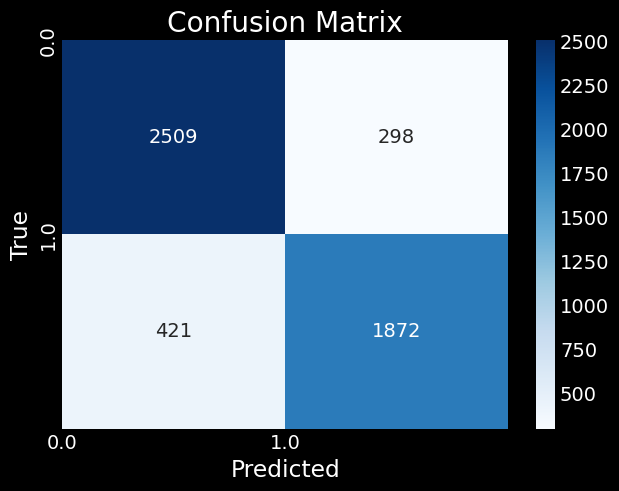

In [52]:
cm = confusion_matrix(y_test,y_pre)
labels = np.unique(y_test)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)
plt.show()
# print(cm)

In [53]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42),
    'KMeans': KMeans(random_state=42),
    'KNN': KNeighborsClassifier()
}

param_grids = {
    'Logistic Regression': {},
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
        'objective': ['binary:logistic']
    },
    'CatBoost': {
        'iterations': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'depth': [1, 2, 3],
        'loss_function': ['Logloss']
    },
    
    'KMeans': {
        'n_clusters': [2, 3, 4, 5],
        'init': ['random'],
        'max_iter': [100, 200, 300],
        'algorithm': ['auto', 'full']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }

}


cv = KFold(n_splits=3, shuffle=True, random_state=42)
grids = {}
best_scores = {}

for model_name, model in models.items():
    print(f'Training and tuning {model_name}...')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    best_model = grids[model_name].best_estimator_

    #save model
    # joblib.dump(best_model, f'D:\BAO KHANH\Dap\model_save\{model_name}_best_model.pkl')

    y_pred = best_model.predict(X_test)
    best_score = accuracy_score(y_test, y_pred)
    best_scores[model_name] = best_score
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best accuracy score for {model_name}: {best_score}\n')

Training and tuning Logistic Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Best parameters for Logistic Regression: {}
Best accuracy score for Logistic Regression: 0.8590196078431372

Training and tuning Random Forest...
Fitting 3 folds for each of 81 candidates, totalling 243 fits


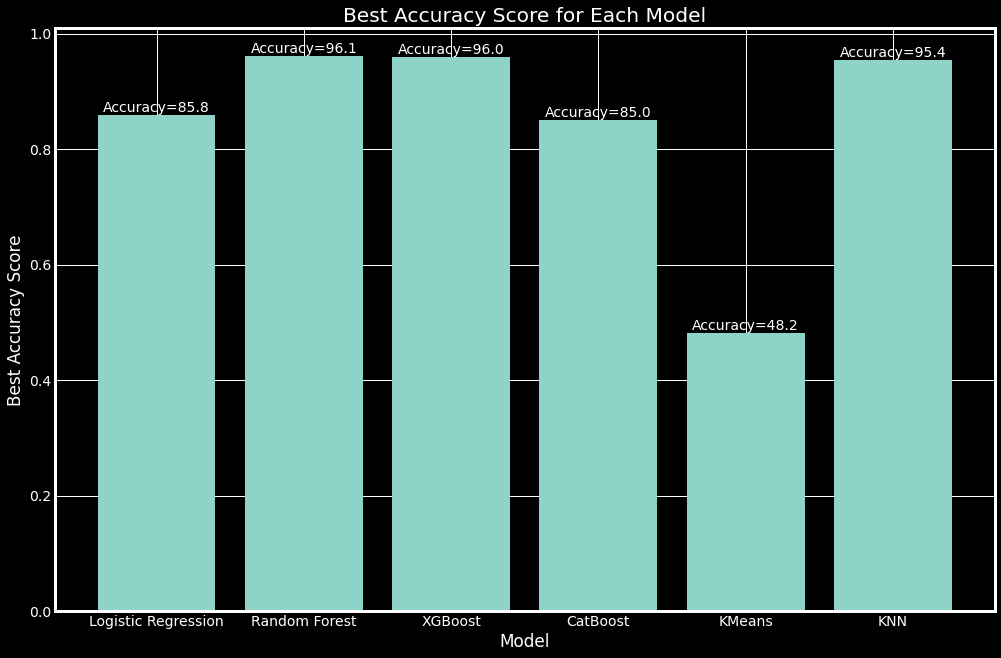

In [ ]:
plt.figure(figsize=(15, 10))
plt.bar(best_scores.keys(), best_scores.values())
plt.xlabel('Model')
plt.ylabel('Best Accuracy Score')
plt.title('Best Accuracy Score for Each Model')
for model_name, score in best_scores.items():
    plt.text(model_name, score, f'Accuracy={score*100:.1f}', ha='center', va='bottom')

plt.show()

In [ ]:
# best model 
# model =joblib.load('D:\BAO KHANH\Dap\model_save\XGBoost_best_model.pkl')
# y_pre=model.predict(test)